# Predicting classes of the iris

The iris dataset has three types of species of the iris flower. The dataset has the measurement of the sepal width, sepal length, petal width, and petal length. I am going to train my model to use the measurement to predict the type of species. In other words, I am going to give the model measurement of the sepal and petal and the model will predict the type of the iris flower. 

In [1]:
# Introduction paragraph to the dataset and overarching data analysis question, such as: 
#  What are features available with the data?
# What is the question you want to answer through analysis?
# What preparation of data did you do, if any? And how?


##  Where did you get the data? And how?
#### iris data set is imported from sklearn.datasets 
#### it is imported by
from sklearn.datasets import load_iris 

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = load_iris()

 ## What are features available with the data?
 The features are sepal length (cm),	sepal width (cm),	petal length (cm),	petal width (cm), and	target. 

In [34]:
# printing the columns (features) that iris dataset have
print (df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


understanding the target and what each value in the taget represent


In [40]:
# printing what are the target names
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

from the previous output we see that 
setosa = 0
versicolor = 1 
virginica  = 2

In [3]:
# sklearn expect to get the target and the resposes as separaet objects
data = pd.DataFrame(df['data'], columns= df['feature_names'])
data['target']= df['target']
# show sample of the data in dataset (first five rows)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#
data.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [6]:
# Checking if there is missing values
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [8]:
# breaking the data test

# training: 80 - 80 train
#               \20 validation
# testing: 20 

x = data.drop('target', axis=1)
y = data['target']

x_all, x_hold, y_all, y_hold =  train_test_split(x, y)
x_train, x_test, y_train, y_test =  train_test_split(x_all, y_all)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
data['traget'] = data['target'].map(str)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   traget             150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Use three different algorithms from Scikit-Learn
Paragraph briefly explaining algorithm and another paragraph on results of each model


### model1 - LogisticRegression


In [11]:

model1 = LogisticRegression(multi_class='auto').fit(x_train, y_train)



In [12]:
y_hat_test= model1.predict(x_test)
y_hat_train= model1.predict(x_train)

In [13]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     81
False     3
Name: target, dtype: int64


In [14]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted: 
True    28
Name: target, dtype: int64


In [15]:
accuracy_score(y_test, y_hat_test)


1.0

In [16]:
accuracy_score(y_train, y_hat_train)

0.9642857142857143

<Figure size 720x720 with 0 Axes>

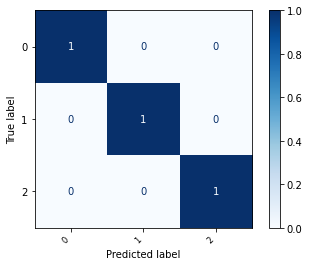

(<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>,
 <function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>)

In [17]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model1, x_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')

plt.xticks(rotation=45, horizontalalignment='right', fontsize='small')
plt.show()

confusion_matrix, plot_confusion_matrix,

### model2 - DecisionTreeClassifier



In [18]:
model2 = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
model2.predict(x_test)


array([1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0])

In [19]:
y_hat_test=model1.predict(x_test)
y_hat_train= model1.predict(x_train)

In [20]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     81
False     3
Name: target, dtype: int64


In [21]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted: 
True    28
Name: target, dtype: int64


In [22]:
accuracy_score(y_test, y_hat_test)

1.0

In [23]:
accuracy_score(y_train, y_hat_train)

0.9642857142857143

### model3 - KNeighborsClassifier






In [24]:
model3 = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
model3.predict(x_test)


array([1, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0])

In [25]:
y_hat_test=model1.predict(x_test)
y_hat_train= model1.predict(x_train)

In [26]:
residuals = y_train == y_hat_train
print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     81
False     3
Name: target, dtype: int64


In [27]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted: 
True    28
Name: target, dtype: int64


In [28]:
accuracy_score(y_test, y_hat_test)

1.0

In [29]:
accuracy_score(y_train, y_hat_train)

0.9642857142857143

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

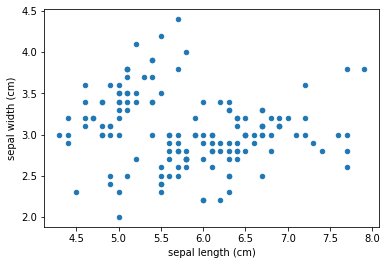

In [30]:
# We'll use this to make a scatterplot of the Iris features.
data.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")